The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-5.5,  5. ]), array([-3.04380774,  7.25150957]), array([-3.37896776, -2.47015489]), array([-0.84672606, -1.54294647]), array([-1.07139055, -0.15636539]), array([-0.64848618,  0.04070589]), array([-0.79908329,  0.01618513]), array([-0.60402738,  0.11471089]), array([-0.70497564,  0.06839143]), array([-0.59409646,  0.12665727]), array([-0.6617641 ,  0.09237488]), array([-0.59355627,  0.12903765]), array([-0.63891524,  0.10562559]), array([-0.59538332,  0.12935285]), array([-0.62578835,  0.11362094]), array([-0.59746061,  0.12919903]), array([-0.61784171,  0.11866615]), array([-0.59920245,  0.12897585]), array([-0.61286431,  0.12192765]), array([-0.60051787,  0.12878277]), array([-0.60967569,  0.1240653 ]), array([-0.60146347,  0.12863652]), array([-0.60760214,  0.12547789]), array([-0.60212526,  0.12853165]), array([-0.60624014,  0.12641608]), array([-0.60258121,  0.12845849])

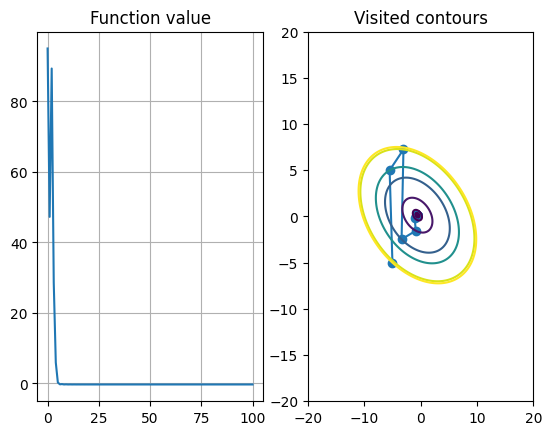

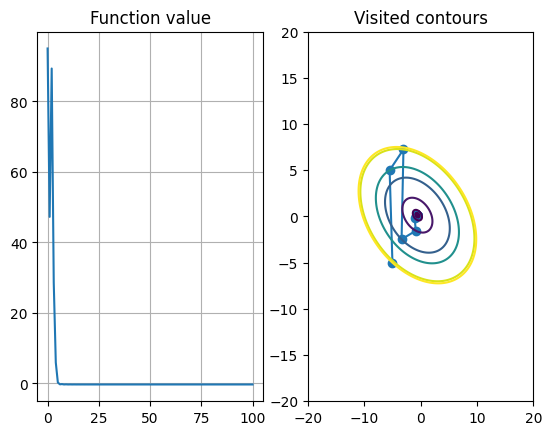

In [148]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi=SearchRegion2d((-20, 20), (-20, 20))

def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x**2 + b * y**2 + c * x*y + d * x + e * y
    return func

def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])
    return func

f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)

def sum_funcs(f, g):
    return lambda x: f(x) + g(x)

#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: (len(steps) > 50) or (len(steps) > 2 and np.linalg.norm(steps[-1] - steps[-2]) < 1e-15))
points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.5, 0.2), lambda f, steps: len(steps) > 100)
print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

